In [1]:
from qiskit import QuantumCircuit, QuantumRegister

In [2]:
def make_incr(n):
    incr = QuantumCircuit(n, name='incr')
    for i in range(n):
        ctrls = list(range(i+1, n))
        if not len(ctrls):
            incr.x(n-1)
            break
        incr.mcx(ctrls, i)
    return incr
print(make_incr(4))

     ┌───┐               
q_0: ┤ X ├───────────────
     └─┬─┘┌───┐          
q_1: ──■──┤ X ├──────────
       │  └─┬─┘┌───┐     
q_2: ──■────■──┤ X ├─────
       │    │  └─┬─┘┌───┐
q_3: ──■────■────■──┤ X ├
                    └───┘


In [3]:
def make_decr(n):
    decr = QuantumCircuit(n, name='decr')
    for i in range(n):
        ctrls = list(range(i+1, n))
        if not len(ctrls):
            decr.x(n-1)
            break
        decr.mcx(ctrls, i, ctrl_state=(n-i-1) * '0')
    return decr
print(make_decr(4))

     ┌───┐               
q_0: ┤ X ├───────────────
     └─┬─┘┌───┐          
q_1: ──o──┤ X ├──────────
       │  └─┬─┘┌───┐     
q_2: ──o────o──┤ X ├─────
       │    │  └─┬─┘┌───┐
q_3: ──o────o────o──┤ X ├
                    └───┘


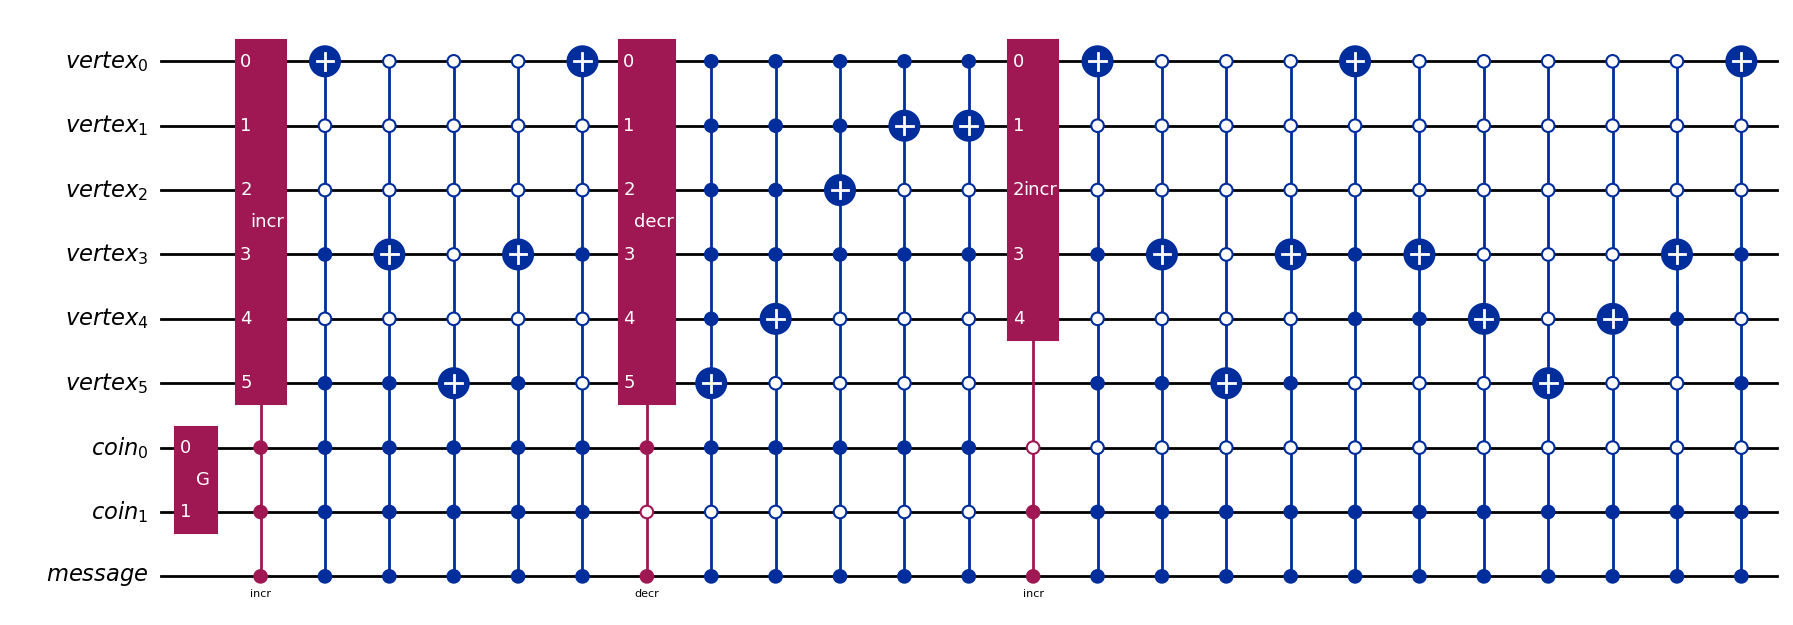

In [33]:
incr1 = make_incr(6).to_gate()
decr = make_decr(6).to_gate()
incr2 = make_incr(5).to_gate()
g = QuantumCircuit(2, name='G').to_gate()

incr1 = incr1.control(3, label='incr')
decr = decr.control(3, ctrl_state='011', label='decr')
incr2 = incr2.control(3, ctrl_state='101', label='incr')

vertex = QuantumRegister(6, name='vertex')
coin = QuantumRegister(2, name='coin')
message = QuantumRegister(1, name='message')
qc = QuantumCircuit(vertex, coin, message)

qc.append(g, coin)
qc.append(incr1, message[:] + coin[:] + vertex[:])
qc.mcx(list(range(1, qc.num_qubits)), 0, ctrl_state='11110100')
qc.mcx([0, 1, 2] + [4, 5, 6, 7, 8], 3, ctrl_state='11110000')
qc.mcx([0, 1, 2, 3, 4] + [6, 7, 8], 5, ctrl_state='11100000')
qc.mcx([0, 1, 2] + [4, 5, 6, 7, 8], 3, ctrl_state='11110000')
qc.mcx(list(range(1, qc.num_qubits)), 0, ctrl_state='11100100')
qc.append(decr, message[:] + coin[:] + vertex[:])
qc.mcx([0, 1, 2, 3, 4] + [6, 7, 8], 5, ctrl_state='10111111')
qc.mcx([0, 1, 2, 3] + [5, 6, 7, 8], 4, ctrl_state='10101111')
qc.mcx([0, 1] + [3, 4, 5, 6, 7, 8], 2, ctrl_state='10100111')
qc.mcx([0] + [2, 3, 4, 5, 6, 7, 8], 1, ctrl_state='10100101')
qc.mcx([0] + [2, 3, 4, 5, 6, 7, 8], 1, ctrl_state='10100101')
qc.append(incr2, message[:] + coin[:] + vertex[:-1])
qc.mcx(list(range(1, qc.num_qubits)), 0, ctrl_state='11010100')
qc.mcx([0, 1, 2] + [4, 5, 6, 7, 8], 3, ctrl_state='11010000')
qc.mcx([0, 1, 2, 3, 4] + [6, 7, 8], 5, ctrl_state='11000000')
qc.mcx([0, 1, 2] + [4, 5, 6, 7, 8], 3, ctrl_state='11010000')
qc.mcx(list(range(1, qc.num_qubits)), 0, ctrl_state='11001100')
qc.mcx([0, 1, 2] + [4, 5, 6, 7, 8], 3, ctrl_state='11001000')
qc.mcx([0, 1, 2, 3] + [5, 6, 7, 8], 4, ctrl_state='11000000')
qc.mcx([0, 1, 2, 3, 4] + [6, 7, 8], 5, ctrl_state='11000000')
qc.mcx([0, 1, 2, 3] + [5, 6, 7, 8], 4, ctrl_state='11000000')
qc.mcx([0, 1, 2] + [4, 5, 6, 7, 8], 3, ctrl_state='11001000')
qc.mcx(list(range(1, qc.num_qubits)), 0, ctrl_state='11010100')

qc.draw(output='mpl')